In [1]:
require 'Utils'
require 'nngraph';
require 'loadcaffe'
require 'image'
require 'VGG'
require 'optim'
require 'Net2'
dtype = 'torch.DoubleTensor'

In [2]:
basedir = '../../results/'
batch_size = 6;
require'lfs'
dirs = {}
for file in lfs.dir(basedir) do
    if string.find(file,'image_checkpoint') then
        table.insert(dirs,basedir .. file .. "/")
    end
end

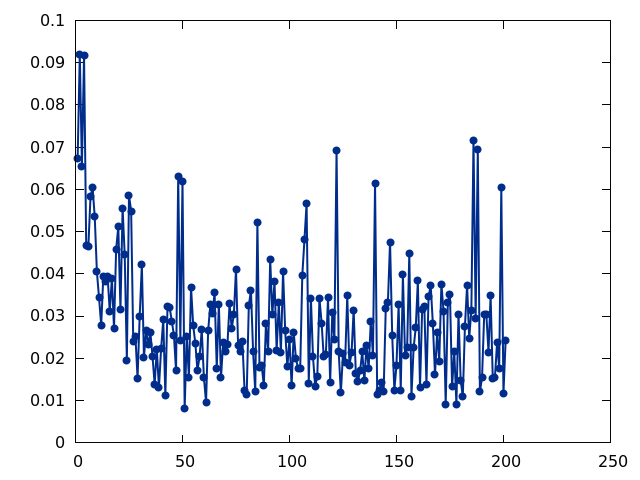

In [3]:
itorch.image(image.load(basedir..'train_history.png'))

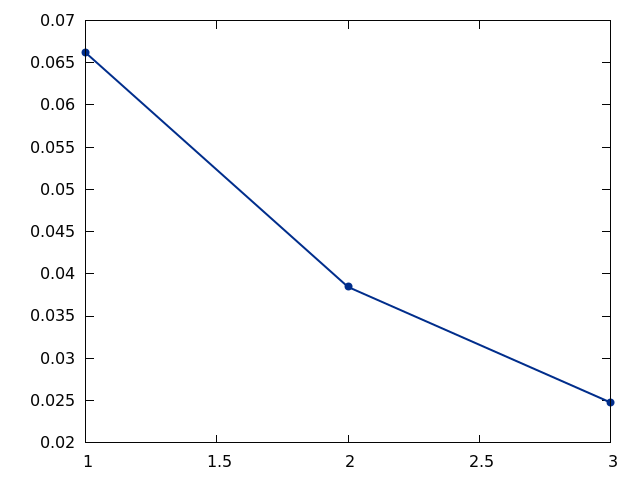

In [4]:
itorch.image(image.load(basedir..'val_history.png'))

In [5]:
dir1 = dirs[1]
print(dir1)
orig_images = {}
input_images = {}
for i=1,batch_size do
    table.insert(input_images,image.load(dir1 .. 'input_' .. i .. '.png'))
    table.insert(orig_images,image.load(dir1 .. 'orig_' .. i .. '.png'))
end

../../results/image_checkpoint_201/	


In [6]:
checkpoint_images = {}
for j=1,#dirs do
    temp_image_dict = {}
    for i=1,batch_size do
        table.insert(temp_image_dict,image.load(dirs[j] .. 'output_' .. i .. '.png'))
    end
    table.insert(checkpoint_images,temp_image_dict)
end

{
  1 : ../../results/image_checkpoint_201/
  2 : ../../results/image_checkpoint_101/
  3 : ../../results/image_checkpoint_1/
}
Input         Original            1           2           3	


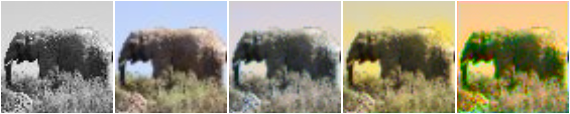

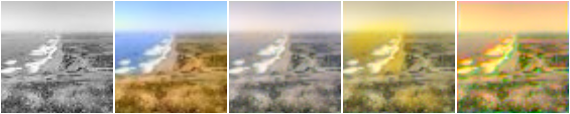

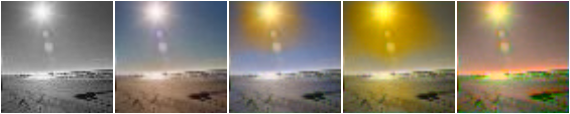

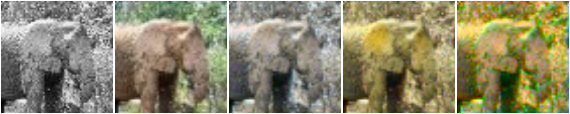

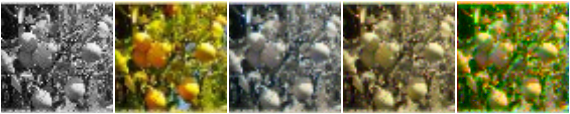

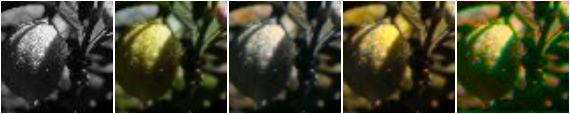

In [7]:
title = "Input" .. "         " .. "Original "
for j=1,#dirs do
    title = title .. "           " .. j
end

print(dirs)
print(title)
for i=1,batch_size do
    temp_image_dict = {}
    table.insert(temp_image_dict,input_images[i])
    table.insert(temp_image_dict,orig_images[i])
    for j=1,#dirs do
        table.insert(temp_image_dict,checkpoint_images[j][i])
    end
    itorch.image(temp_image_dict)
end

In [ ]:
require 'nngraph'
require 'gnuplot'
require 'nn'

-- checkpoint_1 = torch.load('../../arxiv/all_classes_32_3_MSE.t7')  
checkpoint_1 = torch.load('../../results/checkpoint_class_1400.t7')   
a = torch.Tensor(checkpoint_1.train_loss_history) 

In [ ]:
gnuplot.pngfigure('plot_lemon_sky_elephant_class_temp_1.png')
gnuplot.plot(a)
gnuplot.plotflush()

In [ ]:
b = torch.Tensor(checkpoint_1.val_loss_history) 

In [ ]:
gnuplot.pngfigure('plot_lemon_sky_elephant_class_val_1.png')
gnuplot.plot(b)
gnuplot.plotflush()

In [ ]:
-- checkpoint_1 = torch.load('../../results/checkpoint_class_100.t7')
checkpoint_1 = torch.load('../../arxiv/all_classes_32_3_MSE.t7')
model = checkpoint_1.model
local crit = nn.AbsCriterion():type(dtype)
opt = checkpoint_1.opt
model:evaluate()

num_images = 8;
im_batch = get_validation_batch(num_images)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images*2
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load1 = model.output/2
for i = 1,num_images do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load1[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
for i = 1,num_images do
    size = 112
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load1[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
collectgarbage()
checkpoint_1 = torch.load('../../results/checkpoint_80.t7')
model = checkpoint_1.model
local crit = nn.MSECriterion():type(dtype)
opt = checkpoint_1.opt
model:evaluate()

local im_batch = get_validation_batch(4)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images + 0.5
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load = model.output - 0.5
for i = 1,4 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
for i = 1,8 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
checkpoint_1 = torch.load('../../results/checkpoint_40.t7')
model = checkpoint_1.model
local crit = nn.MSECriterion():type(dtype)
opt = checkpoint_1.opt
model:evaluate()

local im_batch = get_validation_batch(opt.batch_size)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images + 0.5
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load = model.output - 0.5
for i = 1,2 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
checkpoint_1 = torch.load('../../results/checkpoint_50.t7')
model = checkpoint_1.model
local crit = nn.MSECriterion():type(dtype)
opt = checkpoint_1.opt

local im_batch = get_validation_batch(opt.batch_size)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images + 0.5
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load = model.output - 0.5
for i = 1,2 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
checkpoint_1 = torch.load('../../results/checkpoint_50.t7')
model = checkpoint_1.model
local crit = nn.MSECriterion():type(dtype)
opt = checkpoint_1.opt
model:evaluate()

local im_batch = get_validation_batch(opt.batch_size)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images + 0.5
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load = model.output - 0.5
for i = 1,2 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end